In [3]:
!pip install -U git+https://github.com/VladimirShitov/nafig.git

  Cloning https://github.com/VladimirShitov/nafig.git to /private/var/folders/p9/74j47tdn36n6s2vcv_5079q0s4wk4h/T/pip-req-build-gdme8729
  Running command git clone -q https://github.com/VladimirShitov/nafig.git /private/var/folders/p9/74j47tdn36n6s2vcv_5079q0s4wk4h/T/pip-req-build-gdme8729
  Resolved https://github.com/VladimirShitov/nafig.git to commit c9de6b641a2b9e086d1ef4b7694e989ccab2f805
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nafig: filename=nafig-0.1.1-py3-none-any.whl size=9616 sha256=e7eef3109e32b73af27f189e113a80f3be1c20db359ed69ab76350d54ab0abff
  Stored in directory: /private/var/folders/p9/74j47tdn36n6s2vcv_5079q0s4wk4h/T/pip-ephem-wheel-cache-0rwmliml/wheels/2c/b4/9b/6a4533340e73be62c001bfcb807ad1b6f34a9acc84fdee38fe
Successfully built nafig


In [1]:
from nafig.plots import na_text_barplot
import ehrapy as ep
import numpy as np
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/vladimir.shitov/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
adata = ep.io.read_h5ad("../../Notebooks/ehrapy_data/adata_pneumonia_unspecified_rest_annotated-1.h5ad")
adata

AnnData object with n_obs × n_vars = 277 × 254
    obs: ' Dexmedetomidine Hydrochloride Injection', '(4:1)Glucose and Sodium Chloride Injection', '0.9% Sodium Chloride Injection', '10% Calcium Gluconate Injection', '10% Chloral Hydrate Enemas', '10% Chloral Hydrate Syrup', '10% Glucose Injection', '10% Potassium Chloride Injection', '10% Potassium Chloride Oral Solution', '10% Sodium Chloride Injection', '20% Albumin Prepared From Human Plasma Injection', '20% Mannitol Injection', '20% Medium and Long Chain Fat Emulsion Injection', '25% Magnesium Sulfate Injection', '5% Amino Acidi Injection', '5% Calcium Chloride Injection', '5% Glucose Injection', '5% Glucose and Sodium Chloride Injection', '5% Sodium Bicarbonate Injection', '50% Glucose Injection', '6% Dextran 40 Glucose Injection', 'Aciclovir for Injection', 'Ademetionine  1,4-Butanedisulfonate for Injection', 'Adrenaline Hydrochlaride Injection', 'Alprostadil Injection', 'Ambroxol Hydrochloride Injection', 'Ambroxol Hydrochloride 

Some of the var names contain different statistics of one feature (e.g. `Systolic Pressure`). Let's leave only one of these columns

In [3]:
adata.var_names

Index(['ehrapycat_received_rest_0.0', 'ehrapycat_received_rest_1.0',
       'ehrapycat_sputum_positive_bacteria_0.0',
       'ehrapycat_sputum_positive_bacteria_1.0',
       'ehrapycat_sputum_positive_fungi_0.0',
       'ehrapycat_sputum_positive_fungi_1.0', 'ehrapycat_ethnicity_Han ethnic',
       'ehrapycat_ethnicity_Miao ethnic', 'ehrapycat_ethnicity_Others',
       'ehrapycat_ethnicity_Tujia ethnic',
       ...
       'Diastolic Pressure_avg', 'Systolic Pressure_min',
       'Systolic Pressure_max', 'Systolic Pressure_avg',
       'C-Reactive Protein_min', 'C-Reactive Protein_max',
       'C-Reactive Protein_avg', 'Procalcitonin_min', 'Procalcitonin_max',
       'Procalcitonin_avg'],
      dtype='object', length=254)

In [4]:
df = pd.DataFrame(adata.layers["original"], columns=adata.var_names, index=adata.obs_names)

feature_types = ["numerical" if var in adata.uns["numerical_columns"] else "categorical"
                 for var in adata.var_names]

unique_features = []  # Real columns from df that we want to keep
cleaned_types = []  # Subset of feature_types for kept columns
feature_names = []  # New cleaner names for the features

for i, col in enumerate(df.columns):
    if col.startswith("ehrapycat_") and (col.endswith("_1.0") or col.endswith("_1")):
        feature = col[len("ehrapycat_"): col.rfind("_")]
        
    elif col.startswith("ehrapycat_"):
        feature = col[len("ehrapycat_"):]
    else:
        feature = col
    
    feature_names.append(feature)
    unique_features.append(col)
    cleaned_types.append(feature_types[i])
        
df = df[unique_features]
df.columns = feature_names

unique_features = []
cleaned_types = []
feature_names = []

for i, col in enumerate(df.columns):
    if col[-3: ] in ["avg", "min", "max"]:
        feature = col[:-4]
        if feature not in feature_names:
            unique_features.append(col)
            feature_names.append(feature)
            cleaned_types.append(feature_types[i])
    else:
        unique_features.append(col)
        feature_names.append(col)
        cleaned_types.append(feature_types[i])

cleaned_types = np.array(cleaned_types)
        
df = df[unique_features]
df.columns = feature_names

In [5]:
df

,received_rest_0.0,received_rest,sputum_positive_bacteria_0.0,sputum_positive_bacteria,sputum_positive_fungi_0.0,sputum_positive_fungi,ethnicity_Han ethnic,ethnicity_Miao ethnic,ethnicity_Others,ethnicity_Tujia ethnic,...,Eosinophil Count,Serum icteric index,Temperature,Heart Rate,Respiratory Rate,Excrement,Diastolic Pressure,Systolic Pressure,C-Reactive Protein,Procalcitonin
9,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.04,0.0,36.000000,92.0,18.0,0.0,59.0,109.0,NaN,0.063
13270,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,36.000000,92.0,18.0,0.0,40.0,75.0,2.11,0.061
13298,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,36.900002,90.0,26.0,0.0,47.0,82.0,2.38,0.656
13761,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,36.799999,146.0,24.0,0.0,64.0,108.0,10.81,NaN


In [6]:
adata.uns["encoding_to_var"]

{'one_hot_encoding': array(['received_rest', 'sputum_positive_bacteria',
        'sputum_positive_fungi', 'ethnicity', 'received_antifungals',
        'received_catecholamines', 'received_antivirals',
        'Serum hemolytic index_max', 'Death', 'gender',
        'received_antibiotics', 'Serum hemolytic index_min', 'Lipase_min',
        'insurance', 'Lipase_max'], dtype=object)}

Remove reduntant categorical columns (e.g. the same columns, which is one-hot encoded)

In [7]:
encoded_cols = adata.uns["encoding_to_var"]["one_hot_encoding"]
encoded_cols

array(['received_rest', 'sputum_positive_bacteria',
       'sputum_positive_fungi', 'ethnicity', 'received_antifungals',
       'received_catecholamines', 'received_antivirals',
       'Serum hemolytic index_max', 'Death', 'gender',
       'received_antibiotics', 'Serum hemolytic index_min', 'Lipase_min',
       'insurance', 'Lipase_max'], dtype=object)

In [8]:
cols_to_take = []
cols_to_remove = []
new_cols_names = []

# Take columns with the same name as in `encoded_cols`
for col in encoded_cols:
    similar_df_cols = df.columns[df.columns.str.startswith(col)]
    
    if col in df.columns:
        cols_to_take.append(col)
        cols_to_remove.extend(similar_df_cols[similar_df_cols != col])
    else:
        cols_to_take.append(similar_df_cols[0])
        cols_to_remove.extend(similar_df_cols[1:])
        
    new_cols_names.append(col)

In [9]:
cols_to_take

['received_rest',
 'sputum_positive_bacteria',
 'sputum_positive_fungi',
 'ethnicity_Han ethnic',
 'received_antifungals',
 'received_catecholamines',
 'received_antivirals',
 'Serum hemolytic index_max_0.0',
 'Death',
 'gender_F',
 'received_antibiotics',
 'Serum hemolytic index_min_0.0',
 'Lipase_min_0.0',
 'insurance_Foundation',
 'Lipase_max_0.0']

In [10]:
cols_to_remove

['received_rest_0.0',
 'sputum_positive_bacteria_0.0',
 'sputum_positive_fungi_0.0',
 'ethnicity_Miao ethnic',
 'ethnicity_Others',
 'ethnicity_Tujia ethnic',
 'received_antifungals_0.0',
 'received_catecholamines_0.0',
 'received_antivirals_0.0',
 'Death_0',
 'gender_M',
 'received_antibiotics_0.0',
 'insurance_Medical Insurance',
 'insurance_Premiums Pay',
 'insurance_Self Pay',
 'insurance_the General Card']

In [11]:
new_cols_names

['received_rest',
 'sputum_positive_bacteria',
 'sputum_positive_fungi',
 'ethnicity',
 'received_antifungals',
 'received_catecholamines',
 'received_antivirals',
 'Serum hemolytic index_max',
 'Death',
 'gender',
 'received_antibiotics',
 'Serum hemolytic index_min',
 'Lipase_min',
 'insurance',
 'Lipase_max']

In [12]:
cleaned_types = cleaned_types[~df.columns.isin(cols_to_remove)]
df = df.drop(cols_to_remove, axis=1)
df = df.rename(columns=dict(zip(cols_to_take, new_cols_names)))

In [14]:
len(cleaned_types)

90

In [15]:
len(df.columns)

90

In [30]:
import matplotlib.pyplot as plt

In [65]:
from typing import Literal, Union

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nafig.utils import _bin_features


def na_text_barplot(
    df,
    num_bins=10,
    remove_empty_bins: Union[bool, Literal["right"]] = False,
    font_size=6,
    line_height=1,
    y_tick_step=10,
    hue=None,
    palette="tab10",
    fig_width=15,
    dpi=100,
    xlabel="NA percentage",
    xlabel_fontsize=6,
    title_pad=1,
    title="",
    title_loc="center",
    title_fontsize=6,
    background_color="white",
    legend_title: str = "Feature type",
    legend_fontsize: int = 6,
) -> plt.Axes:
    """Visualize missing values in a dataframe. Splits features (columns) in bins grouped by proportion of NA values.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe to visualize
    num_bins : int = 10
        Number of bins to split the features into
    remove_empty_bins : Union[bool, Literal["right"]] = False,
        Whether to remove bins that have no features in them. If "right", only the rightmost empty bins are removed.
    font_size : int = 6
        Font size for the feature names
    line_height : float = 1
        Height of each line in the plot
    y_tick_step : int = 10
        How frequently ticks for the number of features in a group are drawn
    hue : Union[Iterable, bool] = None
        Array-like object with length equal to the number of features in the dataframe. Can specify feature types
        or any other grouping variable for features. If None, data types of columns are used. If False, no hue is used.
    palette : str = "tab10"
        Palette to use for coloring the features
    fig_width : int = 15
        Width of the figure. Height is calculated based on the number of features in the highest bin and `line_height`
    dpi : int = 100
        Dots per inch for the figure
    xlabel : str = "NA percentage"
        Label for the x axis
    xlabel_fontsize : int = 6
        Font size for the x axis label
    title_pad : float = 1
        Padding for the title
    title : str = ""
        Title for the plot
    title_loc : str = "center"
        Location of the title. Can be one of "left", "center", "right"
    title_fontsize : int = 6
        Font size for the title
    background_color : str = "white"
        Background color for the plot
    legend_title : str = "Feature type"
        Title for the legend
    legend_fontsize : int = 6
        Font size for the legend

    Returns
    -------
    matplotlib axis

    """
    # table where 1 mean that feature is missed for an observations, and 0 that it is present
    na_df = df.isna().astype(int)

    # How many NAs does each feature has
    sorted_na_counts = na_df.sum(axis=0).sort_values(ascending=False)

    percentages = (sorted_na_counts / df.shape[0]) * 100

    # Split the data into bins
    bin_ranges = list(range(0, 101, 100 // num_bins))
    bin_labels = np.array(
        [f"{bin_ranges[i]}-{bin_ranges[i + 1]}%" for i in range(num_bins)]
    )

    binned_features = _bin_features(
        num_bins=num_bins, na_percentages=percentages, bin_ranges=bin_ranges
    )

    if hue is None:
        hue = df.dtypes

    # Sort features within each bin based on hue
    if hue is not False:
        for bin_features in binned_features:
            bin_features.sort(key=lambda feature: hue[df.columns.get_loc(feature)])

    bin_lengths = np.array([len(feature_bin) for feature_bin in binned_features])

    bins_to_leave = np.ones_like(binned_features, dtype=bool)

    if remove_empty_bins is True:
        bins_to_leave = bin_lengths > 0
    elif remove_empty_bins == "right":
        empty_bins = bin_lengths == 0
        for i in range(len(empty_bins) - 1, -1, -1):
            if not empty_bins[i]:
                break
            bins_to_leave[i] = False

    binned_features = binned_features[bins_to_leave]
    bin_labels = bin_labels[bins_to_leave]
    bin_lengths = bin_lengths[bins_to_leave]

    bin_indices = np.arange(len(binned_features))

    # Find the largest bin to extract y ticks from it
    largest_bin_idx = np.argmax(bin_lengths)
    max_features_per_bin = bin_lengths[largest_bin_idx]

    fig, ax = plt.subplots(figsize=(fig_width, 6), dpi=dpi)

    fig.patch.set_facecolor(background_color)
    ax.patch.set_facecolor(background_color)

    ax.set_xlim(-1, len(binned_features))
    ax.set_ylim(0, max_features_per_bin)

    if hue is not False:
        # Create a colormap based on the specified palette
        colors = sns.color_palette(palette, len(np.unique(hue)))
        cmap = dict(zip(np.unique(hue), colors))

        # Add legend with colors
        legend_elements = [
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                markerfacecolor=cmap[label],
                markersize=5,
                label=label,
            )
            for label in np.unique(hue)
        ]
        ax.legend(handles=legend_elements, title=legend_title, fontsize=legend_fontsize)

    # Plot the feature names at specified coordinates
    for i, features in enumerate(binned_features):
        for j, feature in enumerate(features):
            color = "black" if hue is False else cmap[hue[df.columns.get_loc(feature)]]
            ax.text(
                i,
                j * line_height,
                feature,
                ha="center",
                va="bottom",
                fontdict={"size": font_size, "color": color},
            )

            # Add a new tick each `y_tick_step` iterations
            if i == largest_bin_idx and j % y_tick_step == 0 and j > 0:
                tick_y = (j - 1) * line_height
                ax.text(x=-1, y=tick_y, s=f"{j} –")

    title_y = max_features_per_bin * line_height + title_pad

    if title:
        if title_loc == "left":
            title_x = -1
        elif title_loc == "center":
            title_x = np.mean(bin_indices)
        else:
            title_x = np.max(bin_indices)

        ax.text(
            title_x, title_y, title, ha=title_loc, fontdict={"size": title_fontsize}
        )

    ax.set_xlabel(xlabel, fontsize=xlabel_fontsize)

    ax.set_xticks(bin_indices, bin_labels)
    ax.set_yticks([], [])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    return ax


(-0.8, 5.3)

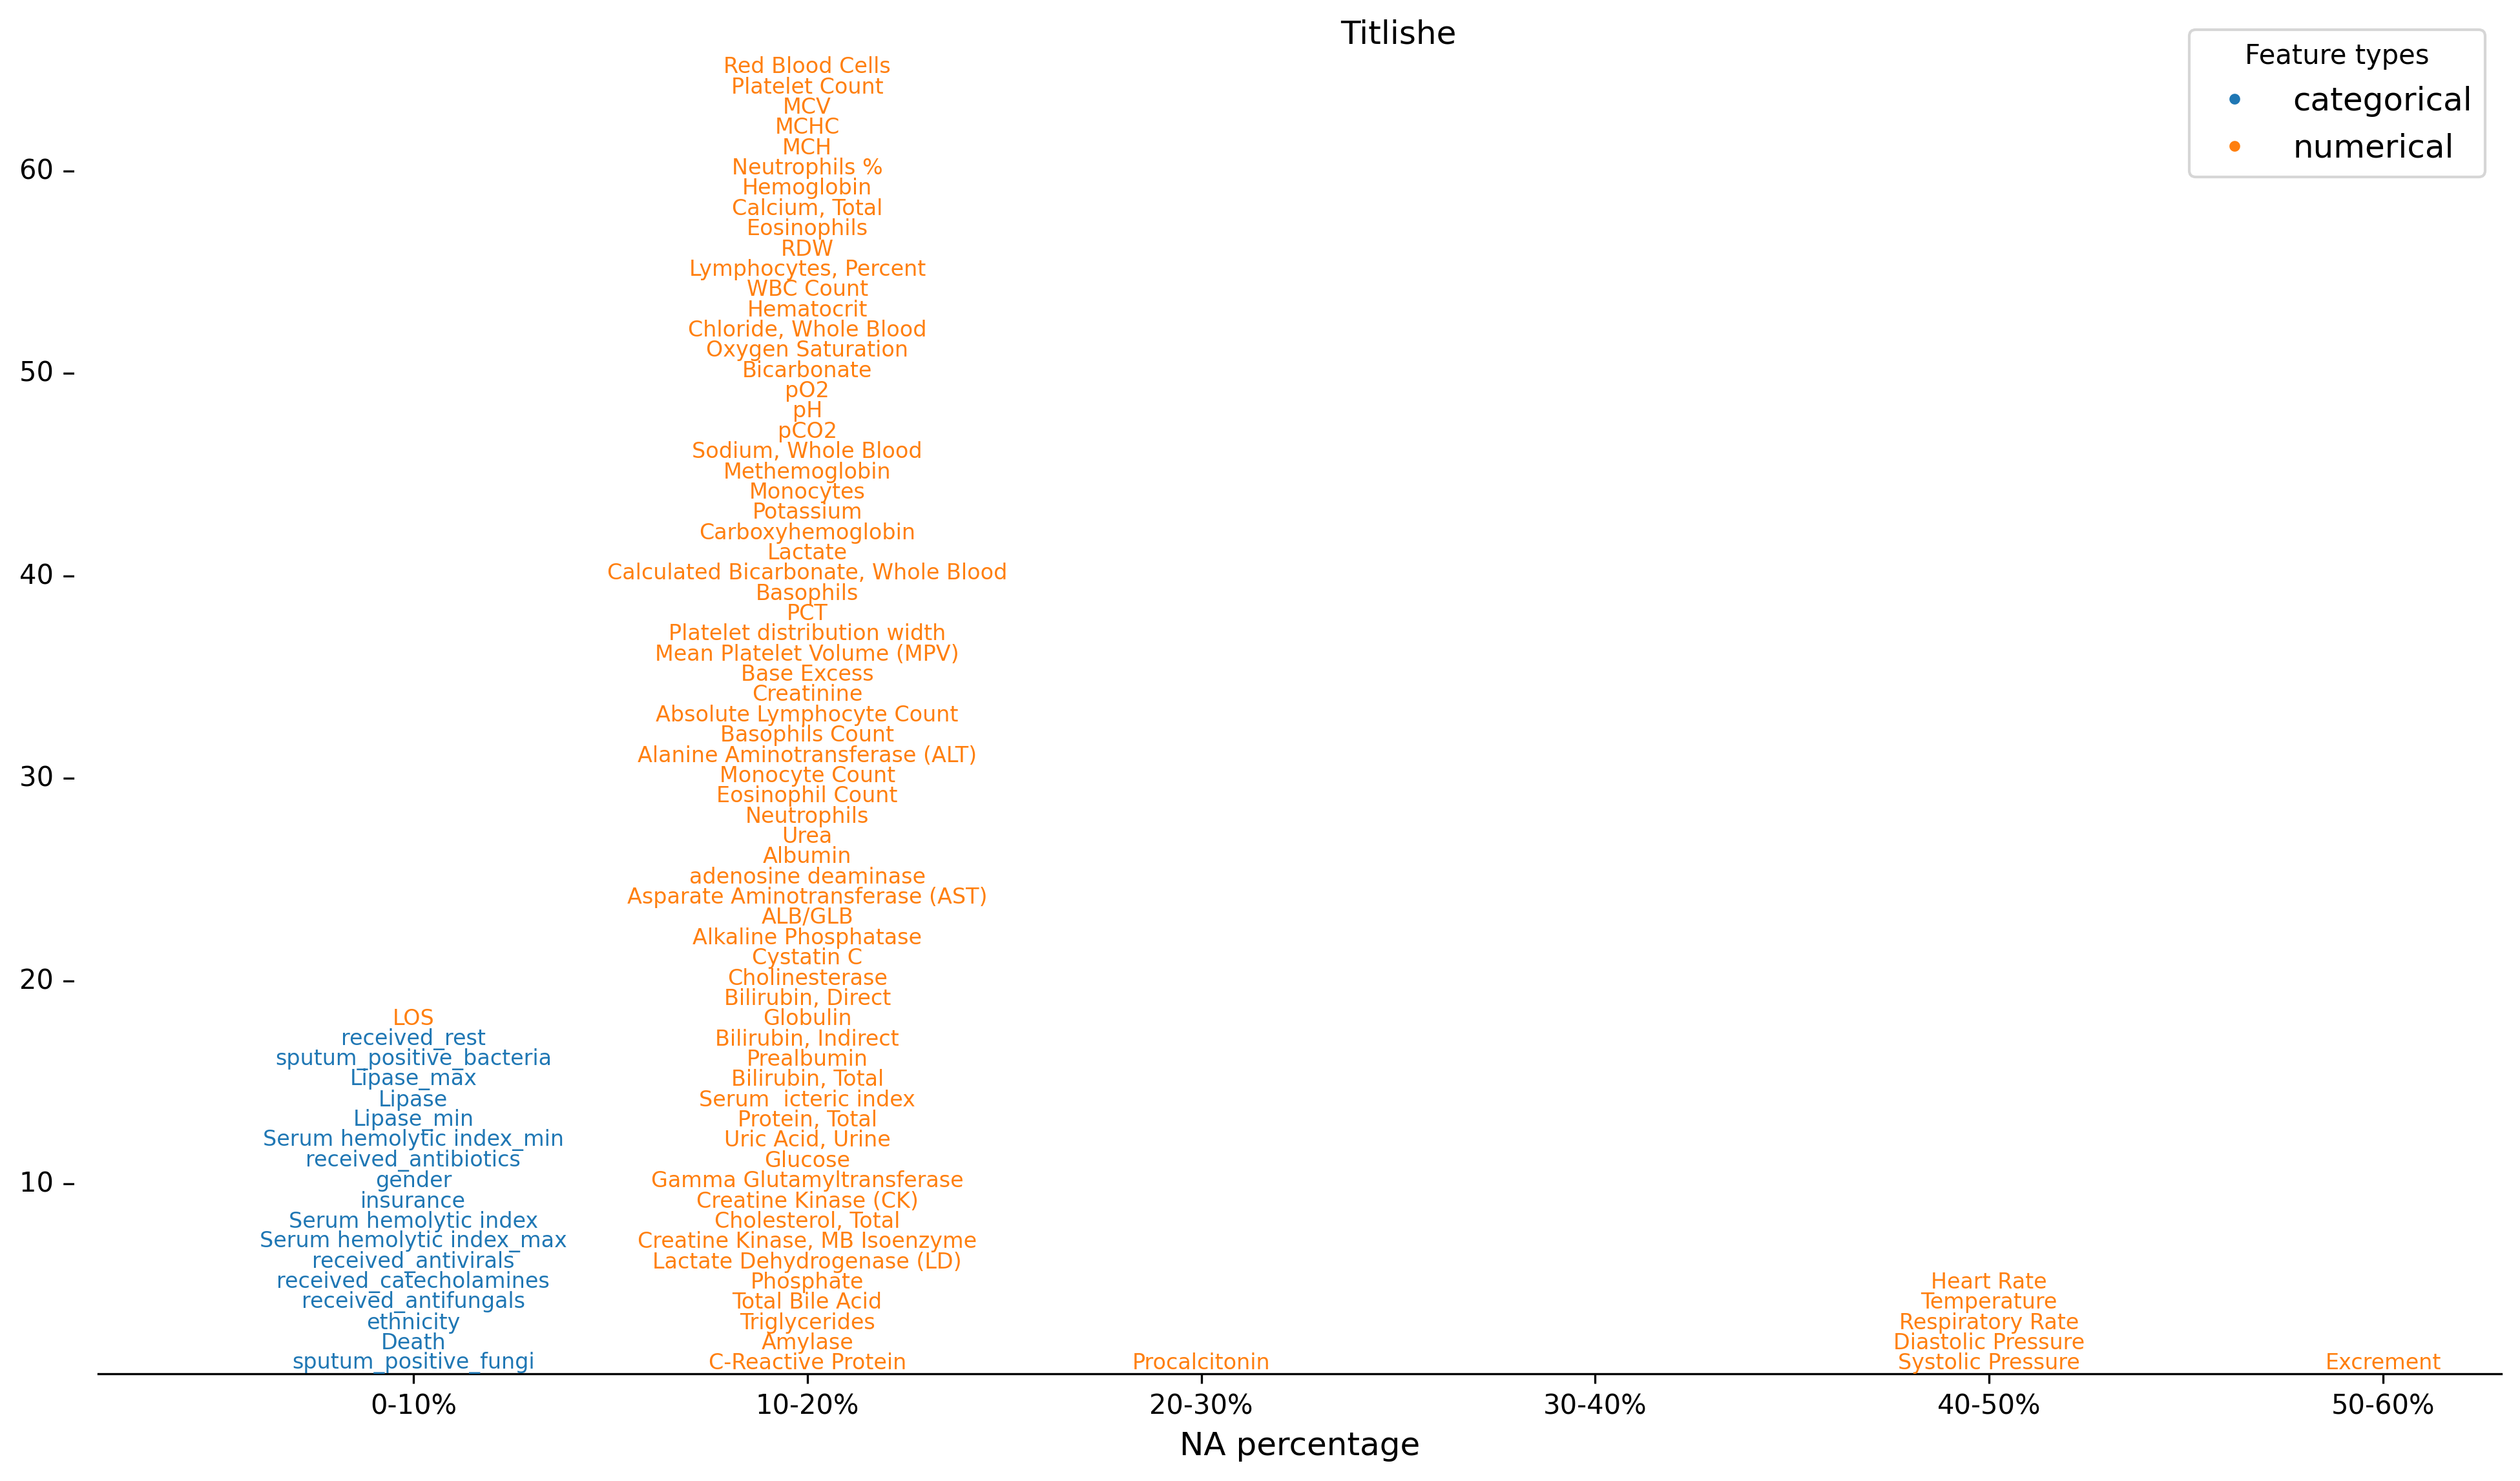

In [69]:
ax = na_text_barplot(
    df,
    hue=cleaned_types,
    num_bins=10,
    line_height=1.5,
    fig_width=16,
    remove_empty_bins="right",
    font_size=8,
    legend_title="Feature types",
    xlabel_fontsize=12,
    title_fontsize=12,
    title="Titlishe",
    legend_fontsize=12,
    dpi=300
)

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1.55))  # Change the location here

ax.set_xlim(-0.8, 5.3)

In [58]:
legend.legend_handles[0]

In [56]:
handle, 

In [53]:
dir(legend)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alignment',
 '_alpha',
 '_animated',
 '_auto_legend_data',
 '_axes',
 '_bbox_to_anchor',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_custom_handler_map',
 '_default_contains',
 '_default_handler_map',
 '_draggable',
 '_find_best_position',
 '_findoffset',
 '_fontsize',
 '_fully_clipped_to_axes',
 '_get_anchored_bbox',
 '_get_loc',
 '_gid',
 '_in_layout',
 '_init_legend_box',
 '_internal_update',
 '_label',
 '_legend_box',
 '_legend_handle_box',
 '_legend_title_box',
 '_loc',
 '_loc_real',
 '_loc_used_default',
 '_mode',
 '_mouseover',
 '_ncol

In [19]:
df["Lipase_min"].value_counts()

Lipase_min
1.0    229
0.0     48
Name: count, dtype: int64

In [6]:
df = pd.concat([df, adata.obs], axis=1)

In [7]:
for col in adata.obs.columns:
    if pd.api.types.is_numeric_dtype(adata.obs[col]):
        if len(np.unique(adata.obs[col])) < 8:
            cleaned_types.append("categorical")
        else:
            cleaned_types.append("numerical")
    else:
        cleaned_types.append("numerical")

In [8]:
duplicated_cols = df.columns.duplicated()
df = df.loc[:, ~duplicated_cols]
cleaned_types = np.array(cleaned_types)[~duplicated_cols]

In [9]:
df.shape

(277, 337)

In [10]:
len(cleaned_types)

337

In [11]:
df

,received_rest_0.0,received_rest,sputum_positive_bacteria_0.0,sputum_positive_bacteria,sputum_positive_fungi_0.0,sputum_positive_fungi,ethnicity_Han ethnic,ethnicity_Miao ethnic,ethnicity_Others,ethnicity_Tujia ethnic,...,leiden_0_3,leiden_0_5,leiden_0_7,leiden_0_8,leiden_0_9,leiden_1_0,leiden_1_1,leiden_2_0,leiden_0_6,Pneumonia unspecified - annotated
9,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,2,1,0,0,0,4,4,2,severe bacterial pneumonia with fungal co-infe...
23,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,2,1,0,0,0,3,3,2,severe bacterial pneumonia with fungal co-infe...
24,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,2,1,0,0,0,3,10,2,severe bacterial pneumonia with fungal co-infe...
36,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,3,3,2,3,1,2,3,sepsis
41,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,2,1,0,0,0,4,4,2,severe bacterial pneumonia with fungal co-infe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,3,3,2,3,1,7,0,"viral pneumonia, mild course"
13270,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,2,1,0,0,0,4,4,2,severe bacterial pneumonia with fungal co-infe...
13298,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,3,3,2,3,1,7,0,"viral pneumonia, mild course"
13761,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,3,3,2,3,1,2,3,sepsis


In [12]:
adata.obs

,Dexmedetomidine Hydrochloride Injection,(4:1)Glucose and Sodium Chloride Injection,0.9% Sodium Chloride Injection,10% Calcium Gluconate Injection,10% Chloral Hydrate Enemas,10% Chloral Hydrate Syrup,10% Glucose Injection,10% Potassium Chloride Injection,10% Potassium Chloride Oral Solution,10% Sodium Chloride Injection,...,leiden_0_3,leiden_0_5,leiden_0_7,leiden_0_8,leiden_0_9,leiden_1_0,leiden_1_1,leiden_2_0,leiden_0_6,Pneumonia unspecified - annotated
9,0.0,9651.2,6575.500,0.0,5.0,20.0,0.0,425.5,23.0,41.0,...,0,2,1,0,0,0,4,4,2,severe bacterial pneumonia with fungal co-infe...
23,0.0,3680.0,1298.500,0.0,0.0,0.0,0.0,264.5,44.0,21.0,...,0,2,1,0,0,0,3,3,2,severe bacterial pneumonia with fungal co-infe...
24,0.0,2260.0,2393.500,0.0,0.0,0.0,125.0,152.0,20.0,40.0,...,0,2,1,0,0,0,3,10,2,severe bacterial pneumonia with fungal co-infe...
36,0.0,160.0,916.800,10.0,0.0,0.0,0.0,3.0,0.0,21.0,...,1,0,3,3,2,3,1,2,3,sepsis
41,0.0,3780.0,12815.484,116.8,0.0,0.0,0.0,220.5,20.0,19.0,...,0,2,1,0,0,0,4,4,2,severe bacterial pneumonia with fungal co-infe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,0.0,220.0,1140.000,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,1,0,3,3,2,3,1,7,0,"viral pneumonia, mild course"
13270,0.0,5235.0,3493.700,0.0,0.0,0.0,0.0,123.0,0.0,0.0,...,0,2,1,0,0,0,4,4,2,severe bacterial pneumonia with fungal co-infe...
13298,0.0,1270.0,349.000,10.0,0.0,0.0,0.0,18.0,0.0,0.0,...,1,0,3,3,2,3,1,7,0,"viral pneumonia, mild course"
13761,0.0,800.0,7.200,0.0,0.0,0.0,0.0,22.5,0.0,0.0,...,1,0,3,3,2,3,1,2,3,sepsis


<Axes: xlabel='NA percentage'>

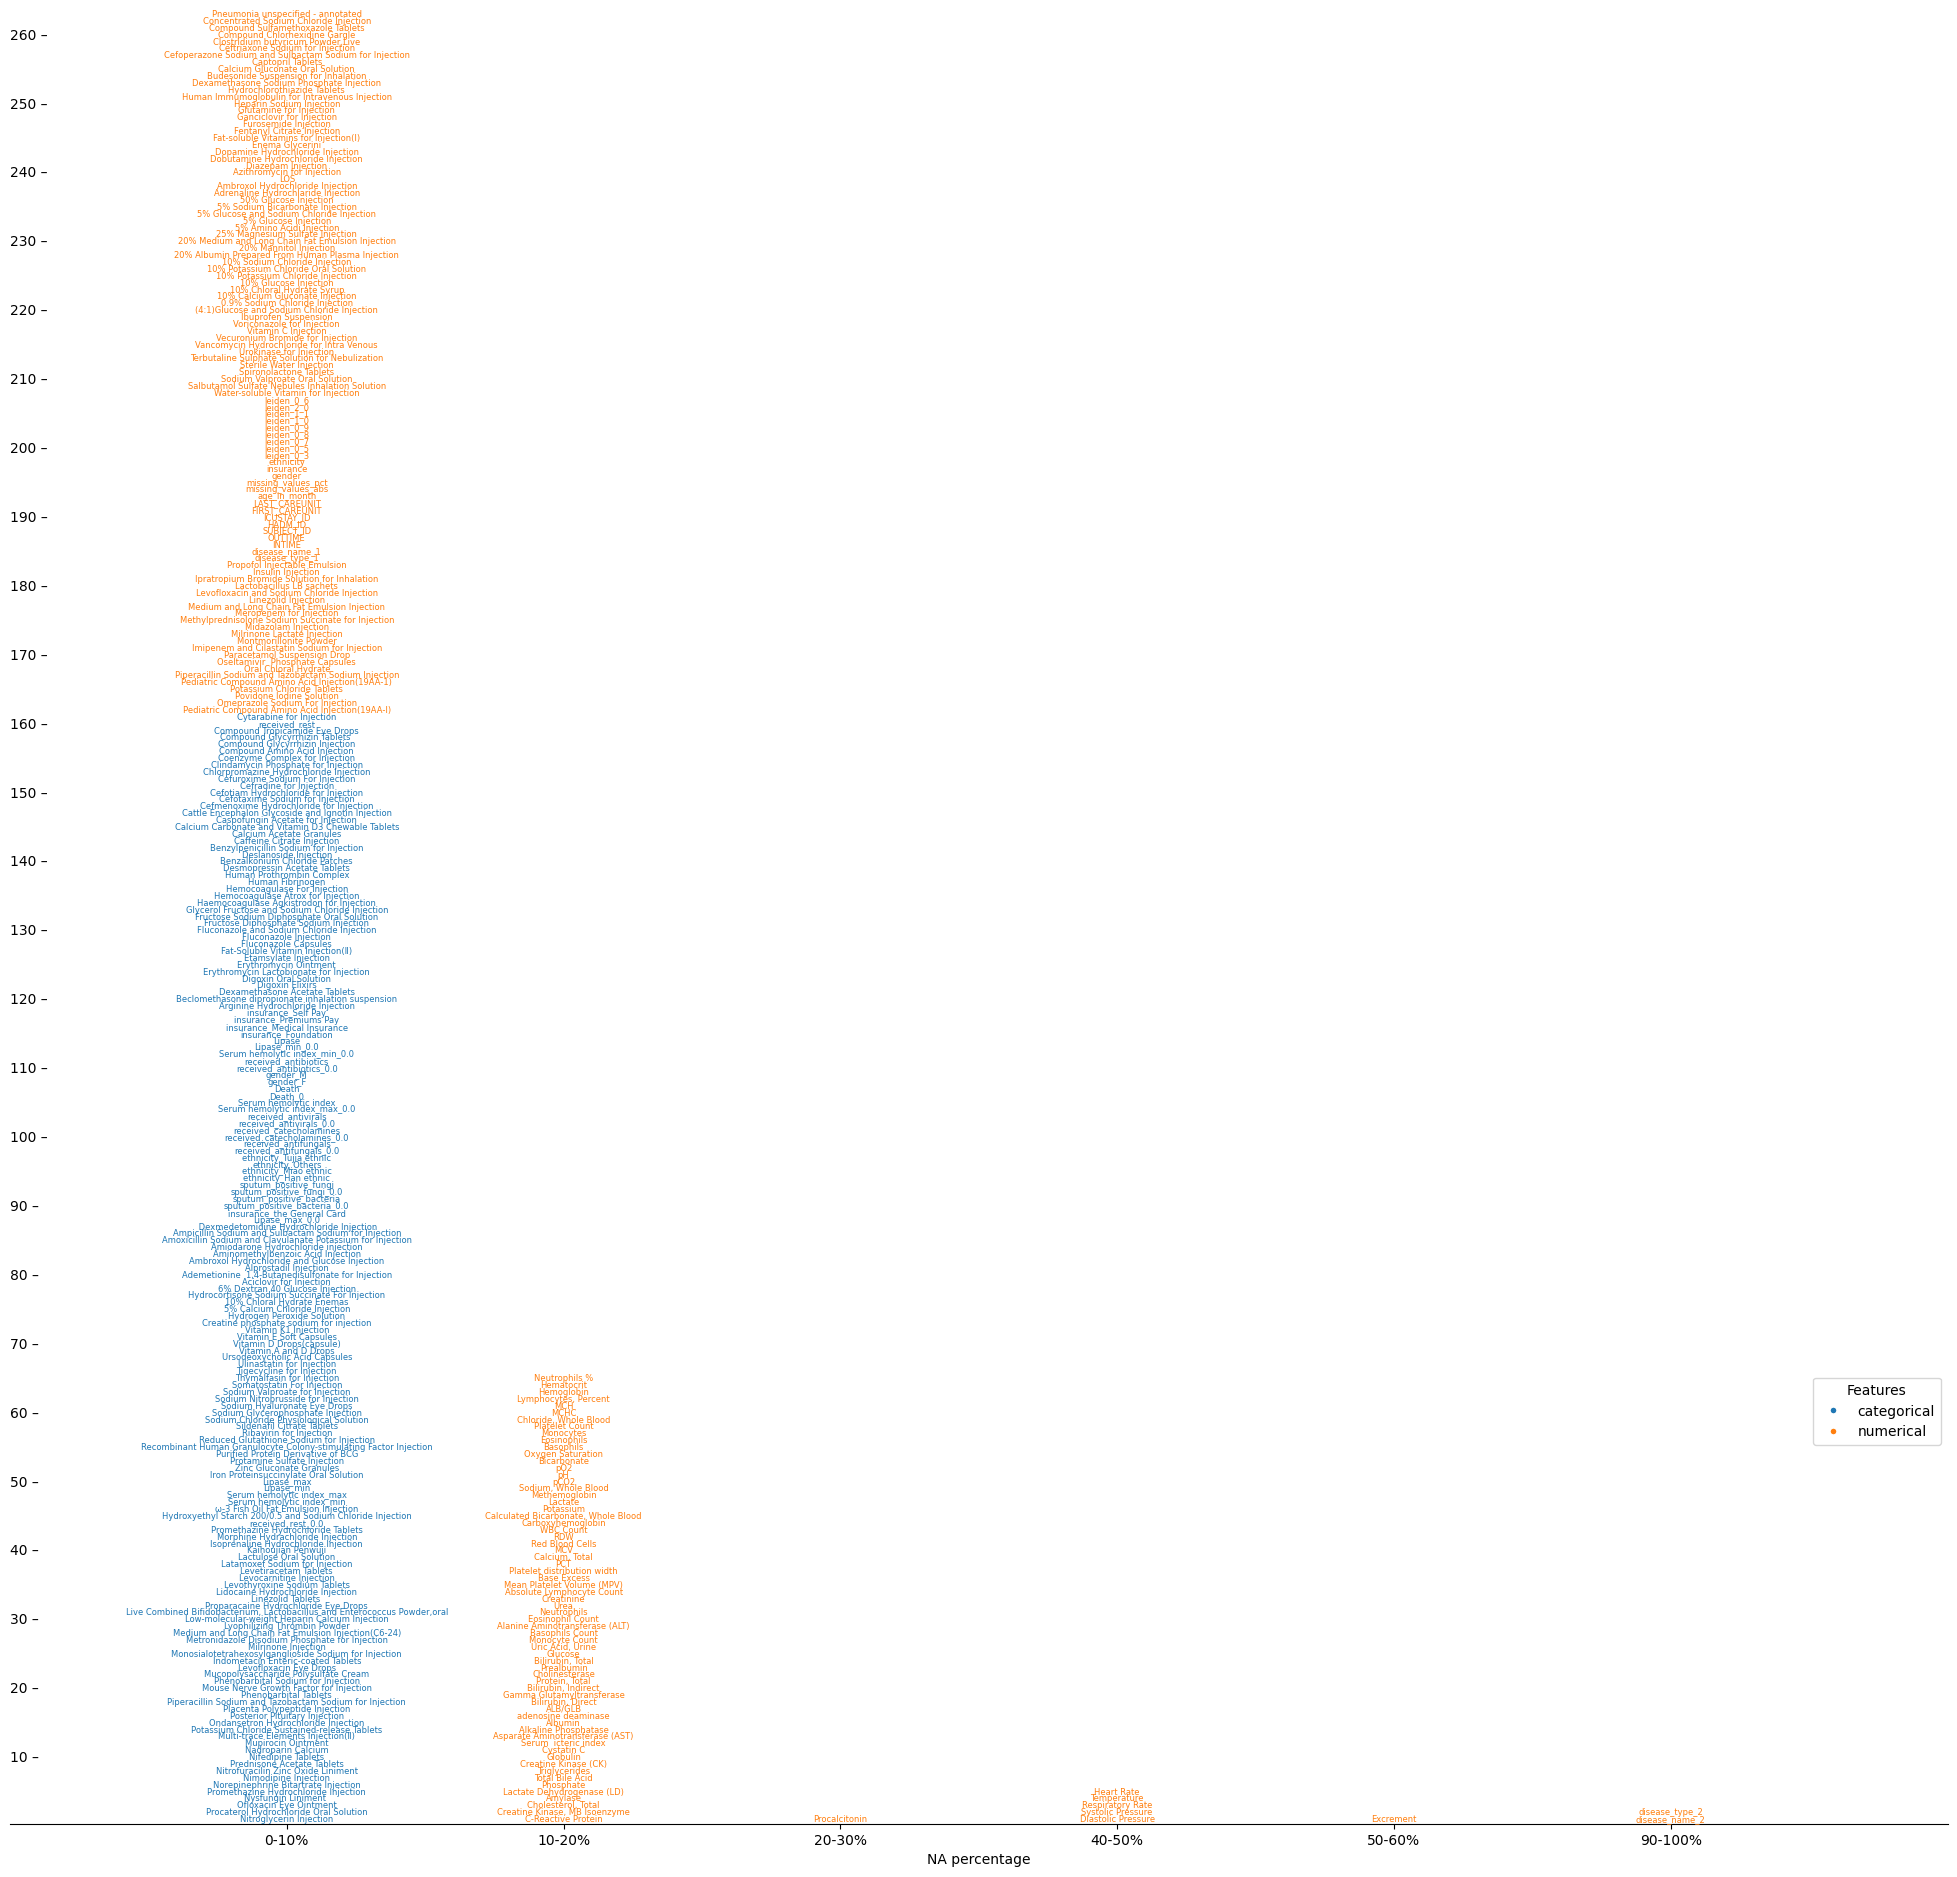

In [18]:
na_text_barplot(df, hue=cleaned_types, num_bins=10, line_height=4, remove_empty_bins=True, fig_width=25)